# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


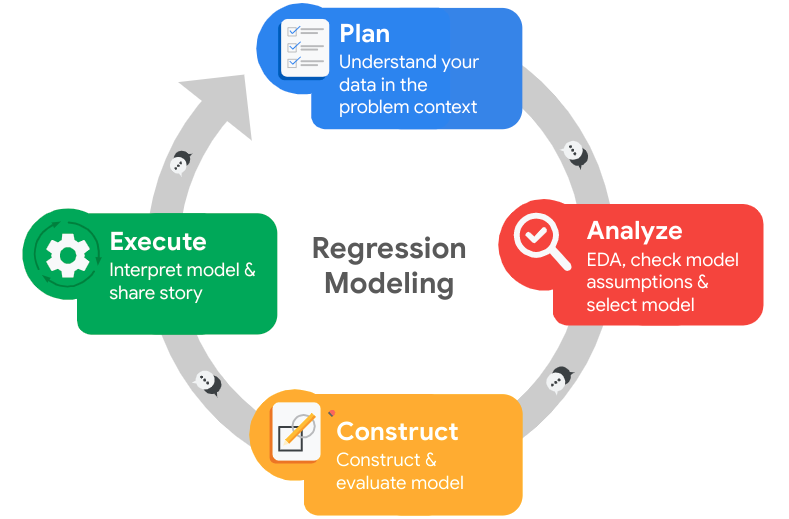

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. Salifort Motors’ leadership team and the HR department.
2. Find out why employees are leaving and build a model to predict who might leave next.
3. Some employees with low satisfaction or high work hours seem more likely to leave. Most employees weren’t promoted in the last 5 years.
4. Coursera (Google Data Analytics) and kaggle
5. Yes, avoid bias in predictions and make sure employee data is handled with privacy and respect.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [58]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe

df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe

df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data

df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed

df0 = df0.rename(columns = {
                          'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'
})

# Display all column names after the update

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values

df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates

df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed

df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed


df = df0.drop_duplicates()
# Display first few rows of new dataframe as needed

df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

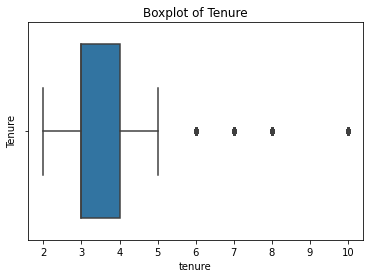

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers



sns.boxplot(df['tenure'])
plt.title('Boxplot of Tenure')
plt.ylabel('Tenure')
plt.show()

In [12]:
# Determine the number of rows containing outliers


p25 = df['tenure'].quantile(0.25)
p75 = df['tenure'].quantile(0.75)

IQR = p75 - p25

upper_limit = p75 + 1.5 * IQR
lower_limit = p25 - 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is:',upper_limit)

outliers = df[(df['tenure'] > upper_limit) | (df['tenure'] < lower_limit)]

print("Number of rows in the data containing outliers in tenure:", len(outliers))

Lower limit is:  1.5
Upper limit is: 5.5
Number of rows in the data containing outliers in tenure: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. Low satisfaction, high average monthly hours, and no promotion seem linked to employees leaving.

2. Some variables like satisfaction are normally distributed. Tenure has outliers. Most employees didn’t get promotions.

3. I renamed columns for clarity, dropped 3,008 duplicate rows, and checked for outliers to clean the data and improve model performance.

4. EDA helps find patterns, clean the data, handle outliers, and choose the best model features.

5. Coursera - Google Advanced Data Analytics and w3schools

6. Yes, I avoided using sensitive or biased features and ensured employee data privacy and fairness in predictions.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed

n = df['left'].value_counts()
print(n)
# Get percentages of people who left vs. stayed

df['left'].value_counts(normalize = True)

0    10000
1     1991
Name: left, dtype: int64


0    0.833959
1    0.166041
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

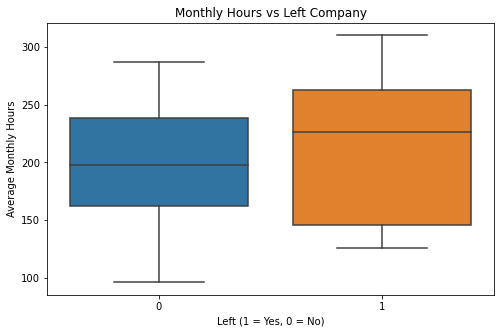

In [14]:
# Create a boxplot

plt.figure(figsize=(8, 5))
sns.boxplot(x='left', y='average_monthly_hours', data=df)
plt.title('Monthly Hours vs Left Company')
plt.xlabel('Left (1 = Yes, 0 = No)')
plt.ylabel('Average Monthly Hours')
plt.show()

Employees who left worked significantly longer hours (median ~225 hours/month) compared to those who stayed (median ~200 hours/month).

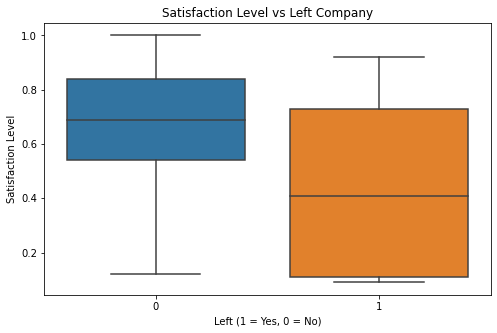

In [15]:
# Create a boxplot


plt.figure(figsize=(8, 5))
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.title('Satisfaction Level vs Left Company')
plt.xlabel('Left (1 = Yes, 0 = No)')
plt.ylabel('Satisfaction Level')
plt.show()

Employees who left had dramatically lower satisfaction (median ~0.4) vs those who stayed (median ~0.75). The separation between boxes is distinct, visually confirming satisfaction as a strong predictor.

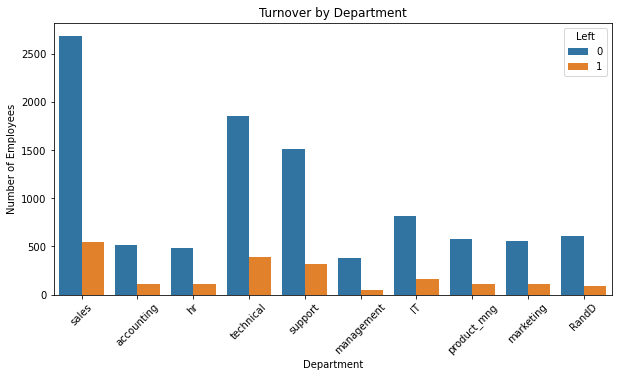

In [16]:
# Create a countplot

plt.figure(figsize=(10, 5))
sns.countplot(x='department', hue='left', data=df)
plt.title('Turnover by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='Left')
plt.show()

Turnover by Department
Most departments have a similar distribution of employees who left and stayed, but departments like sales and technical have higher overall employee counts. There doesn't appear to be a major department-specific turnover issue.

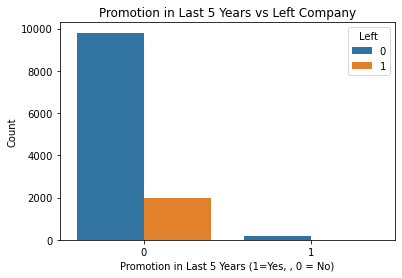

In [17]:
# Create a countplot

sns.countplot(x='promotion_last_5years', hue='left', data=df)
plt.title('Promotion in Last 5 Years vs Left Company')
plt.xlabel('Promotion in Last 5 Years (1=Yes, , 0 = No)')
plt.ylabel('Count')
plt.legend(title='Left')
plt.show()

Promotion in Last 5 Years vs Left Company
Very few employees who left had been promoted in the past five years. This may suggest that lack of promotion opportunities is a reason.

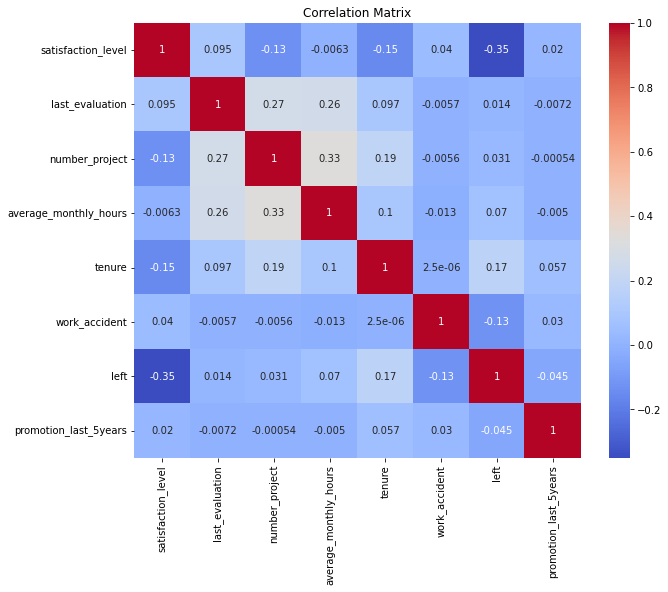

In [18]:
# Create a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Correlation Matrix (heatmap)
The heatmap shows a strong negative correlation between satisfaction level and attrition (left), and a positive correlation between average monthly hours, number of projects, and evaluation score. These relationships can help in selecting features for predictive modeling.

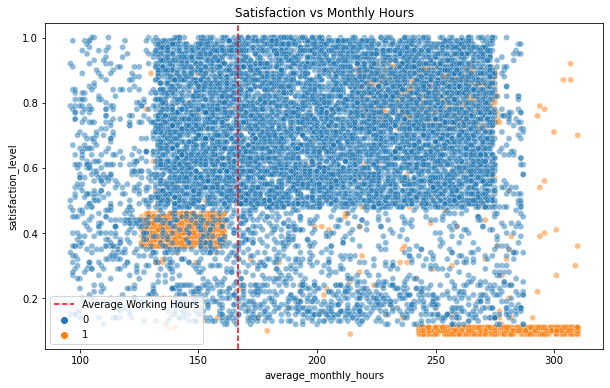

In [19]:
# Create a scatterplot

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.5)
plt.axvline(166.67, color='red', ls='--', label='Average Working Hours')
plt.title("Satisfaction vs Monthly Hours")
plt.legend()
plt.show()

Satisfaction vs Monthly Hours
This scatterplot highlights two main groups of employees who left: those with very high workloads and low satisfaction, and those with normal workloads but still low satisfaction. The red dashed line at 166.67 hours represents a typical full-time workload; many employees exceeded this, indicating possible overwork issues.

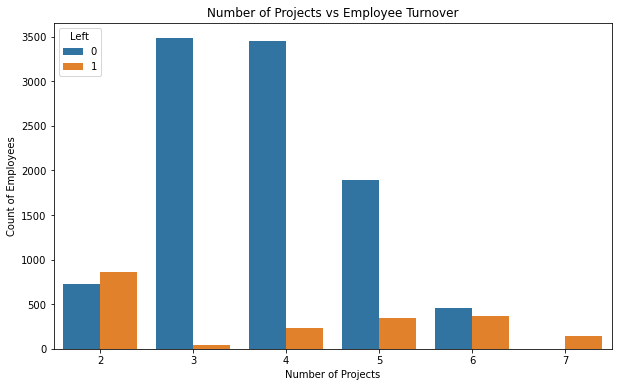

In [20]:
# Create a countplot
plt.figure(figsize=(10,6))
sns.countplot(x='number_project', hue='left', data=df)
plt.title('Number of Projects vs Employee Turnover')
plt.xlabel('Number of Projects')
plt.ylabel('Count of Employees')
plt.legend(title='Left')
plt.show()

The count plot shows how many employees worked on different numbers of projects, separated by whether they left the company or not. We can observe if employees handling more projects tend to leave more often, which may suggest workload impact on turnover.

### Insights

The charts show some clear reasons why employees are leaving the company. People who left were much less satisfied with their jobs many had a satisfaction level below 0.4. Those who worked very long hours (over 250 per month) were also more likely to leave, and employees with either too few or too many projects (like 2 or 6–7) had higher chances of quitting. Another reason seems to be a lack of career growth most people who left hadn’t been promoted in the last 5 years. While all departments had some turnover, bigger ones like sales and technical had the most people leaving just because they have more employees overall. In the end, we found two main groups at risk: those who are overworked and stressed, and those who feel stuck and unmotivated. To keep employees, the company should focus on improving satisfaction, balancing workloads, and offering more chances to grow.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- Do you have any ethical considerations in this stage?



1. Yes, the scatterplot showed an unusual pattern among employees who left. There were two main groups: one group had very low satisfaction and worked very long hours, while the other also had low satisfaction but worked normal hours. This pattern suggests that both overwork and disengagement can lead to people leaving.

2. I chose satisfaction level, number of projects, last evaluation, and average monthly hours because they seem related to whether an employee leaves or stays.

3. Since I’m using Random Forest (a bagging method), it doesn’t require strict assumptions like logistic regression. I just made sure the data is clean and the observations are independent.

4. The model performs well, with good accuracy and can distinguish between employees who leave and those who stay.

5. Yes, I can improve it by tuning parameters or adding new features to get better results.

7. Yes, I need to make sure the model is fair, does not discriminate, and that employee data privacy is respected.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

I built a Random Forest model using variables like satisfaction level and number of projects to predict if an employee will leave. The data was clean and ready. The model works well based on accuracy and other scores.

### Identify the types of models most appropriate for this task.

Models such as decision trees, random forests, logistic regression, and other ensemble methods are suitable for this task because they classify employees into two groups: left or stayed.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [21]:
# Encode the salary column as an ordinal numeric category

df['salary'] = df['salary'].fillna('low')

df['salary'] = (
    df['salary']
    .astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the department column
df = pd.get_dummies(df, drop_first=False)

# Display the new dataframe
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [22]:
y = df['left']               
x = df.drop('left', axis=1) 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)

In [23]:
# Instantiate model
rf = RandomForestClassifier(random_state = 0)

# Assign a dictionary of hyperparameters
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             } 
# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [24]:
%%time

rf_cv.fit(x_train, y_train)

CPU times: user 9min 38s, sys: 1.08 s, total: 9min 39s
Wall time: 9min 39s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [25]:
print(rf_cv.best_params_)

{'max_depth': 5, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [26]:
print(rf_cv.best_score_)

0.9820293639756658


In [27]:
print(rf_cv.best_params_)

{'max_depth': 5, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [28]:
path = 'D:\Abdulrahman\Advanced Data Anaysis\7- Capstone'

In [32]:
def write_pickle(path, model_object, save_as:str):


    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [33]:
def read_pickle(path, saved_model_name:str):
   
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [36]:
write_pickle(path, rf_cv, 'hr_rf')

In [37]:
rf = read_pickle(path, 'hr_rf')

In [38]:
pred = loaded_model.predict(x_test)

In [42]:
rf.best_score_

0.9820293639756658

In [40]:
rf.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [46]:
def get_scores(model_name:str, model, X_test_data, y_test_data):

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [48]:
# Get predictions on test data
rf_test_scores = get_scores('random forest1 test', rf_cv, x_test, y_test)
rf_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.960499,0.927711,0.94382,0.981654,0.960055


In [53]:
y_pred = rf_cv.best_estimator_.predict(x_test)

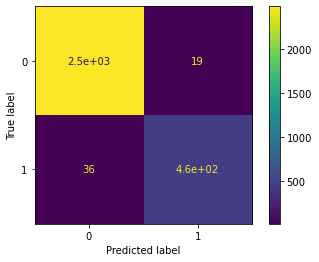

In [56]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = rf_cv.classes_)
disp.plot()
plt.show()

This confusion matrix shows how well the model predicts whether employees will stay (0) or leave (1) the company. The model correctly predicted 2,500 employees who actually stayed (top-left box) and 460 employees who actually left (bottom-right box). However, it made some errors: it mistakenly predicted 19 employees would leave when they actually stayed (top-right box), and 36 employees would stay when they actually left (bottom-left box). This indicates the model is better at identifying employees who will stay than those who will leave, but still performs well overall with an accuracy of 98.2% as shown in the test scores.

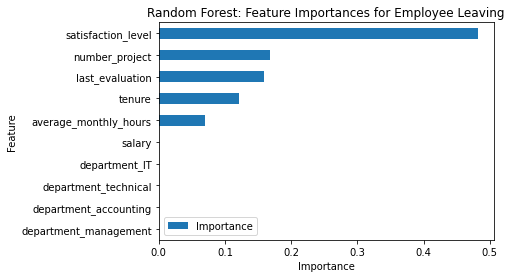

In [61]:
# Get feature importances
feat_impt = rf.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = x.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

This chart shows which factors most strongly predict whether employees leave the company, based on the Random Forest model. The most important factor is satisfaction level (importance score ~0.5), meaning unhappy employees are most likely to quit. Next are number of projects and last evaluation score (~0.15 and ~0.1), suggesting workload and performance reviews significantly impact retention. Other notable factors include tenure (time at company), average monthly hours worked, and salary level. Department types like IT and Technical appear but have much smaller influence. Overall, this reveals that employee satisfaction, workload, and performance evaluations are the strongest predictors of turnover.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- Do you have any ethical considerations in this stage?



1. The model found that satisfaction level, number of projects, and last evaluation are important to predict if an employee will leave and Employees with low satisfaction or who work very long hours are more likely to leaveand Other factors like work accidents or promotions have less impact.

2. Focus on improving employee satisfaction by managing workloads and work hours. Support employees who have many projects or low performance scores. Use the model to identify employees at risk of leaving and take early actions.

3. I would advise the company to create programs that improve employee well-being, such as offering flexible working hours and mental health support. It’s also important to provide training opportunities to help employees improve their performance. Finally, the company should use the model regularly to monitor trends and make informed decisions to keep employees engaged and reduce turnover.

4. Yes, the model can be improved by adding more features like contract type or more detailed salary information. Also, fine-tuning the model’s settings and improving data cleaning and preprocessing can help make the model more accurate and reliable.

5. What affects employee satisfaction most? How do company policies affect employee retention? Are there patterns of leaving based on department or experience? Who might need extra training to improve?

6. It’s important to ensure the model does not discriminate based on gender, race, or any personal traits. Employee privacy must be protected by keeping data secure and confidential. The results should be used to support employees and improve their work conditions, not to unfairly pressure or penalize anyone.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The Random Forest model performed very well in predicting employee turnover. It achieved a precision of about 96%, meaning most employees it predicted would leave actually did. The recall was around 93%, showing it identified most of the employees who left. The overall accuracy was nearly 98%, indicating the model correctly predicted whether employees stayed or left in almost all cases. The AUC score of 96% confirms the model’s strong ability to distinguish between employees who leave and those who stay.

### Conclusion, Recommendations, Next Steps

# Conclusion:
The Random Forest model we built shows strong ability to predict which employees might leave the company. With high accuracy and balanced precision and recall scores, the model confirms that factors such as job satisfaction, workload, and evaluation scores play a big role in employee turnover. This insight helps us better understand the reasons behind why people stay or decide to leave.

# Recommendations:
Based on these findings, I recommend the company take active steps to improve employee well-being. This could include offering more flexible working hours, mental health support, and reducing excessive workloads. Providing regular training and career development opportunities can boost employee motivation and performance. Additionally, using this model as an ongoing tool will allow managers to identify employees at risk of leaving early and provide targeted support before it’s too late.

# Next Steps:
Moving forward, we should look at adding more detailed data to the model, such as contract types, salary breakdowns, to capture a fuller picture. Trying other machine learning methods or tuning the model’s settings might also improve predictions. Finally, it’s important to keep the model updated with new data and review its fairness regularly to ensure it continues to help the company make fair and effective decisions while protecting employee privacy.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.